https://www.yeastgenome.org/

https://www.yeastgenome.org/api/doc

https://www.cse.msu.edu/~cse835/Papers/Graph_connectivity_revised.pdf => connexite

Maslov et al., 2013, Segundo et al., 2011, Tomita and Kameda, 2007 => Ensemble stable


isthme, trouver les cycles et circonférence, sommet-connexite, centralité, nb chromatique, contraction plutôt que suppression, partition, dureté, force, stable, clique, noyau, dominants


In [23]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def parcours_profondeur(graphe: dict, sommet: int) -> list:
    """
        Algorithme de parcours en profondeur d'un graphe.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
            - sommet (int): correspond à la racine de l'aborescence de parcours en profondeur.
        
        Sorties:
            - pere (list): correspon à l'arborescence avec pere[x] est le père du sommet x dans le parcous en profondeur.
            
        Complexité:
            - O(n)
    """
    taille = max(graphe.keys())
    
    etat = [None for _ in range(taille)]
    pere = [None for _ in range(taille)]
    dernier_pred = [None for _ in range(taille)]
    
    nb_vu = 1
    
    pile = [sommet]
    
    while nb_vu <= taille:
        
        if nb_vu not in graphe.keys():
            
            nb_vu += 1
        
        elif etat[nb_vu - 1] is not None:
            
            nb_vu += 1
            
        elif pile == []:
            
            pile.append(nb_vu)
            
        while pile != []:
            
            suivant = pile.pop()
            
            if etat[suivant - 1] is None:
                
                etat[suivant - 1] = 0
                pere[suivant - 1] = dernier_pred[suivant - 1]
                
                for successeur in graphe[suivant]:
                    
                    pile.append(successeur)
                    dernier_pred[successeur - 1] = suivant
    return pere


def excentricite_sommet(graphe: dict, sommet: int) -> int:
    """
        Algorithme de calcul d'excentricité d'un sommet dans un graphe. Aussi la hauteur de l'aborescence d'un parcours
        en largeur du graphe à partir du sommet.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
            - sommet (int): correspond à la racine de l'aborescence de parcours en profondeur.
        
        Sorties:
            - max(hauteur) (int): correspond à l'excentricité du sommet.
            
        Complexité:
            - O(n)
    """
    taille = max(graphe.keys())
    
    etat = [None for _ in range(taille)]
    hauteur = [0 for _ in range(taille)]
    
    file = [sommet]
    etat[sommet - 1] = 0
    
    nb_vu = 1
    
    while nb_vu <= taille:
        
        if nb_vu not in graphe.keys():
            
            nb_vu += 1
        
        elif etat[nb_vu - 1] is not None:
            
            nb_vu += 1
            
        elif file == []:
            
            file.append(nb_vu)
            etat[nb_vu - 1] = 0
            
        while file != []:
            
            suivant = file[0]
            file = file[1:] if len(file) > 1 else []
            
            for successeur in graphe[suivant]:
                
                if etat[successeur - 1] is None:
                    
                    file.append(successeur)
                    etat[successeur - 1] = 0
                    hauteur[successeur - 1] = hauteur[suivant - 1] + 1
                    
    return max(hauteur)


def composantes_connexes(graphe: dict) -> list:
    """
        Algorithme de calcul des composantes connexes d'un graphe par parcours en profondeur, à chaque fois qu'un sommet n'a
        pas était visité alors que la pile est vide, compose connexe + 1.
        L'algorithme renvoie de plus les composantes connexes sous forme de liste avec un dictionnaire pour représenter chaque
        composante connexe.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties: 
            - composante (list): Les composantes connexes du graphe.
            
        Complexité:
            - O(n).
    """
    taille = max(graphe.keys())
    
    etat = [None for _ in range(taille)]
    pere = [None for _ in range(taille)]
    dernier_pred = [None for _ in range(taille)]
    composante = []
    
    nb_vu = 1
    sous_graphe_connexe = {1: set()}
    
    pile = [1]
    
    while nb_vu <= taille:
        
        if nb_vu not in graphe.keys():
            
            nb_vu += 1
        
        elif etat[nb_vu - 1] is not None:
            
            nb_vu += 1
            
        elif pile == []:
            
            composante.append(sous_graphe_connexe)
            pile.append(nb_vu)
            sous_graphe_connexe = {nb_vu: set()}
            
        while pile != []:
            
            suivant = pile.pop()
            
            if etat[suivant - 1] is None:
                
                sous_graphe_connexe[suivant] = set()
                etat[suivant - 1] = 0
                pere[suivant - 1] = dernier_pred[suivant - 1]
                
                for successeur in graphe[suivant]:
                    
                    sous_graphe_connexe[successeur] = set() if etat[successeur - 1] is None else sous_graphe_connexe[successeur]
                    sous_graphe_connexe[suivant].add(successeur)
                    sous_graphe_connexe[successeur].add(suivant)
                    pile.append(successeur)
                    dernier_pred[successeur - 1] = suivant
                    
    composante.append(sous_graphe_connexe)
    
    return composante


def sommets_isoles(graphe: dict) -> set:
    """
        Algorithme qui renvoie les sommets isolées d'un graphe, ou les sommets de degré = 0.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
            
        Sorties:
            - isoles (set): ensemble de sommets isolées i.e de degré nul.
            
        Complexité:
            - O(n)
    """
    isoles = set()
    
    for v1, voisins in graphe.items():
        
        if len(voisins) == 0:
            
            isoles = isoles.union({v1})
    
    return isoles


def cycle(graphe: dict) -> bool:
    """
        Algorithme qui réalise un parcours en profondeur, si rencontre deux fois un sommet alors il renvoie vrai 
        si le graphe possède un cycle, faux sinon.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties:
            - cyclique (bool): Vrai si le graphe possède un cycle, faux sinon.
            
        Complexité:
            - O(n)
    """
    cyclique = False
    
    taille = len(graphe.keys())
    
    etat = [None for _ in range(taille)]
    dernier_pred = [None for _ in range(taille)]
    
    nb_vu = 1
    
    pile = [list(graphe.keys())[0]]
    
    while nb_vu <= taille:
        
        if nb_vu not in graphe.keys():
            
            nb_vu += 1
        
        elif etat[nb_vu - 1] is not None:
            
            nb_vu += 1
            
        elif pile == []:
            
            pile.append(nb_vu)
            cc += 1
            
        while pile != []:
            
            suivant = pile.pop()
            
            if etat[suivant - 1] is None:
                
                etat[suivant - 1] = 0
                
                for successeur in graphe[suivant]:
                    
                    if (etat[successeur - 1] is not None) and (dernier_pred[suivant - 1] != successeur):
                        
                        cyclique = True
                        break
                        
                    pile.append(successeur)
                    dernier_pred[successeur - 1] = suivant
    
                if cyclique: break
            if cyclique: break
        if cyclique: break
    
    return cyclique


def points_articulations(graphe: dict) -> set:
    """
        Algorithme qui renvoie l'ensemble des points d'articulations d'un graphe, par un parcours en profondeur si la racine
        possède N fils avec N > 1 alors point d'articulation.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties:
            - points (set): L'ensemble des points d'articulations d'un graphe.
            
        Complexité:
            - O(n^2)
    """
    points = set()
    
    for s in graphe:
        points = points.union({s}) if parcours_profondeur(graphe, s).count(s) > 1 else points
    
    return points


articulation = lambda graphe, s: True if parcours_profondeur(graphe, s).count(s) > 1 else False


def supprimer_sommet(graphe: dict, sommet: int) -> dict:
    """
        Algorithme permettant la création d'un sous-graphe induit avec G' = (V', E') et V - {sommet}.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
            - sommet (int): le sommet a supprimé.
        
        Sorties:
            - nouveau_graphe (dict): correspond au sous-graphe induit.
        
        Complexité:
            - O(|V|+|E|)
    """
    nouveau_graphe = graphe.copy()
    
    for s in nouveau_graphe.keys():
        nouveau_graphe[s] = nouveau_graphe[s].difference({sommet})
    del nouveau_graphe[sommet]
    
    return nouveau_graphe

def graphe_complementaire(graphe: dict) -> dict:
    """
        Algorithme qui permet de calculer le graphe complémentaire de G.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties:
            - complementaire (dict): graphe complémentaire du graphe d'entrée
        
        Complexité:
            - O(?)
    """
    complementaire = {sommet: set(graphe.keys()) for sommet in graphe.keys()}
    
    for s, voisins in graphe.items():
        
        complementaire[s] = complementaire[s].difference(graphe[s].union({s}))

    return complementaire

    
def centres(graphe: dict) -> tuple:
    """
        Algorithme calculant l'ensemble des centres d'un graphe par le calcul de l'excentricité minimale.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties:
            - (tuple): Renvoie (x, y) avec x l'ensemble des centres et y leurs excentricités.
            
        Complexité:
            - O(n^2)
    """
    excent = {sommet: 0 for sommet in graphe.keys()}
    
    for sommet in graphe:
        excent[sommet] = excentricite_sommet(graphe, sommet)
    
    return set(sommet for sommet in graphe if excent[sommet] == min(excent.values())), min(excent.values())


def diametre(graphe: dict) -> int:
    
    excent = {sommet: 0 for sommet in graphe.keys()}
    
    for sommet in graphe:
        excent[sommet] = excentricite_sommet(graphe, sommet)
    
    return set(sommet for sommet in graphe if excent[sommet] == max(excent.values())), max(excent.values())


densite = lambda graphe: sum(list(map(len, list(graphe.values()))))/(len(graphe.keys())*(len(graphe.keys()) - 1))


def sommets_couvrants(graphe: dict) -> set:
    
    """
        Heuristique de calcul des sommets couvrants (vertex cover).
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties:
            - dom (set): l'ensemble (dont on espère minimum) des sommets couvrants l'ensemble des arêtes.
            
        Complexité:
            - O(n^2)
    """
    
    deg = {sommet: len(voisins) for sommet, voisins in graphe.items()}
    
    def procedure(graphe: dict, degres: dict, dom: set) -> set:
        
        if len(degres) == 0 or max(degres.values()) == 0:
            
            return dom
        
        nouveau = max(degres, key=lambda k: degres[k])
        
        dom = dom.union({nouveau})
        
        for sommet in degres:
            
            if nouveau in graphe[sommet]:
                
                degres[sommet] -= 1
                
        del degres[nouveau]
        
        return procedure(graphe, degres, dom)
    
    return procedure(graphe, deg, set())
    

def contraction(graphe: dict, s1: int, s2: int) -> dict:
    """
        Algorithme de contraction de deux sommets s1, s2 en un sommet appelé s1/s2.
        
        Variable:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
            - s1 (int): le sommet n°1 a fusionné.
            - s2 (int): le sommet n°2 a fusionné.
        
        Sorties:
            - nouveau_graphe (dict): le graphe contracté.
        
        Complexité:
            - O(?)
    """
    nouveau_graphe = graphe.copy()
    
    nouveau_graphe[f"{s1}/{s2}"] = nouveau_graphe[s1].union(graphe[s2])
    
    for sommet, voisins in graphe.items():
        if s1 in voisins or s2 in voisins:
            
            nouveau_graphe[sommet] = (nouveau_graphe[sommet].difference({s1, s2})).union({f"{s1}/{s2}"})
    
    del nouveau_graphe[s1]
    del nouveau_graphe[s2]
    
    return nouveau_graphe

def contraction_pondere(s1, s2, graphe):
    """
        Algorithme de contraction de deux sommets s1, s2 en un sommet appelé s1/s2 et pour toute arêtes incidentes à 
        s1 ou s2 on a w(s1/s2, x) = somme(w(s1, x), w(s2, x)).
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {(voisin1, poids1), (voisin2, poids2), ..., (voisinN, poidsN)}}.
            - s1 (int): le sommet n°1 a fusionné.
            - s2 (int): le sommet n°2 a fusionné.
        
        Sorties:
            - nouveau_graphe (dict): le graphe contracté.
        
        Complexité:
            - O(?)
    """
    sf = f"{s1}/{s2}"
    nouveau_graphe = graphe.copy()

    for sommet in graphe:
        nouveau_graphe[sommet] = {arete for arete in graphe[sommet] if arete[0] not in {s1, s2}}
    del nouveau_graphe[s1], nouveau_graphe[s2]

    for sommet in nouveau_graphe:
        nouveau_graphe[sommet] = nouveau_graphe[sommet].union({(sf, sum(list(map(lambda arete: arete[1], {art for art in graphe[sommet] if art[0] in {s1, s2}}))))})
        nouveau_graphe[sommet] = {(sommet, poids) for sommet, poids in nouveau_graphe[sommet] if poids > 0}
        
    nouveau_graphe[sf] = set()    
        
    for sommet in nouveau_graphe:
        nouveau_graphe[sf] = nouveau_graphe[sf].union({(sommet, arete[1]) for arete in nouveau_graphe[sommet] if arete[0] == sf}) 

    nouveau_graphe[sf] = nouveau_graphe[sf].union({(sf, sum(list(map(lambda arete: arete[1], {art for art in graphe[s1].union(graphe[s2]) if art[0] in {s1, s2}}))))})    
        
    return nouveau_graphe


def stoer_wagner(graphe: dict) -> int:
    """
        Algorithme de Stoer-Wagner afin de trouver la coupe minimale d'un graphe i.e le k pour k-arêtes-connexes.
        
        Variables:
            - graphe (dict): graphe sous la forme de dictionnaire {sommet: {voisin1, voisin2, ..., voisinN}}.
        
        Sorties:
            - (int): La coupe minimale du graphe.
        
        Complexité:
            - O(n^2)
    """
    nouveau_graphe = {sommet: {(voisin, 1) for voisin in voisins} for sommet, voisins in graphe.items()}
    
    coupe = set()
    
    while len(nouveau_graphe) > 2:
        
        graphe_poids = nouveau_graphe.copy()
        ensemble = list(sommet for sommet in nouveau_graphe if "/" in str(sommet))
        ensemble = 1 if ensemble == [] else ensemble[0]
        cpt = 0
        sommets = []
        
        while cpt < len(graphe_poids):
            
            s1, s2, w = None, None, -1
                
            v1 = ensemble
            v2, maximum_local = list(graphe_poids[ensemble])[0]

            for arete in graphe_poids[ensemble]:
                if arete[1] > maximum_local:
                    v2, maximum_local = arete

            if maximum_local > w:
                s1, s2, w = v1, v2, maximum_local
                    
            ensemble = f"{s1}/{s2}"
            sommets.append(s2)
            
            graphe_poids = contraction_pondere(s1, s2, graphe_poids)
            
            cpt += 1
            
        s1, s2 = sommets[-2:]
        
        s1 = str(s1) if "/" in str(s1) else int(s1)
        s2 = str(s2) if "/" in str(s2) else int(s2)
        
        nouveau_graphe = contraction_pondere(s1, s2, nouveau_graphe)
        coupe = coupe.union({w})
    
    coupe = coupe.union({max({poids for aretes in nouveau_graphe.values() for _, poids in aretes})})
    
    return min(coupe)

def Louvain(graphe):
    
    print(len(graphe))
    
    if len(graphe) == 1:
        return graphe
    
    def gain_modularite_in(sommet, voisin, graphe, clusters, correspondance):
        
        sin = 0
        for s1 in clusters[correspondance[voisin]]:
            sin += sum(list(arete[1] for arete in graphe[s1] if arete[0] in clusters[correspondance[voisin]]))
        sin = sin/2
        
        stot = 0
        for s1 in set(graphe.keys()).difference(clusters[correspondance[voisin]]):
            stot += sum(list(arete[1] for arete in graphe[s1] if arete[0] in clusters[correspondance[voisin]]))
        stot += sin
            
        ki = sum(list(arete[1] for arete in graphe[sommet]))
        ki_in = sum(list(arete[1] for arete in graphe[sommet] if arete[0] in clusters[correspondance[voisin]]))
        
        m = 0
        for s1 in graphe:
            m += sum(list(arete[1] for arete in graphe[s1]))
        m /= 2
        
        p1 = ((sin+ki_in)/(2*m)) - (((stot+ki)/(2*m))**2)
        p2 = (sin/(2*m)) - ((stot/(2*m))**2) - ((ki/(2*m))**2)
        
        return p1-p2
    
    def gain_modularite_out(sommet, graphe, clusters, correspondance):
        
        sin = 0
        for s1 in clusters[correspondance[sommet]]:
            sin += sum(list(arete[1] for arete in graphe[s1] if arete[0] in clusters[correspondance[sommet]]))
        sin = sin/2
        
        stot = 0
        for s1 in set(graphe.keys()).difference(clusters[correspondance[sommet]]):
            stot += sum(list(arete[1] for arete in graphe[s1] if arete[0] in clusters[correspondance[sommet]]))
        stot += sin
            
        ki = sum(list(arete[1] for arete in graphe[sommet]))
        ki_in = sum(list(arete[1] for arete in graphe[sommet] if arete[0] in clusters[correspondance[sommet]]))
        
        m = 0
        for s1 in graphe:
            m += sum(list(arete[1] for arete in graphe[s1]))
        m /= 2
        
        p1 = ((sin+ki_in)/(2*m)) - (((stot+ki)/(2*m))**2)
        p2 = (sin/(2*m)) - ((stot/(2*m))**2) - ((ki/(2*m))**2)
        
        return p1-p2
    
    def contraction(sommet, voisin, graphe):

        sf = f"{sommet}/{voisin}"
        nouveau_graphe = graphe.copy()

        for s in graphe:
            nouveau_graphe[s] = {arete for arete in graphe[s] if arete[0] not in {sommet, voisin}}
        del nouveau_graphe[sommet], nouveau_graphe[voisin]

        for s in nouveau_graphe:
            nouveau_graphe[s] = nouveau_graphe[s].union({(sf, sum(list(map(lambda arete: arete[1], {arete for arete in graphe[s] if arete[0] in {sommet, voisin}}))))})
            nouveau_graphe[s] = {(v, poids) for v, poids in nouveau_graphe[s] if poids > 0}

        nouveau_graphe[sf] = set()    

        for s in nouveau_graphe:
            nouveau_graphe[sf] = nouveau_graphe[sf].union({(s, arete[1]) for arete in nouveau_graphe[s] if arete[0] == sf})

        nouveau_graphe[sf] = nouveau_graphe[sf].union(({(sf, sum(list(map(lambda arete: arete[1], {arete for arete in graphe[sommet].union(graphe[voisin]) if arete[0] in {sommet, voisin}}))))}))
        nouveau_graphe[sf] = {(v, poids) for v, poids in nouveau_graphe[sf] if poids > 0}

        return nouveau_graphe
        
    correspondance = {sommet: indice for indice, sommet in enumerate(graphe.keys())}
    clusters = {indice: {sommet} for indice, sommet in enumerate(graphe.keys())}
    
    changement = True
    precedent = -1
    cpt = 0
    
    while changement:
        
        changement = False
    
        for sommet in graphe:
            max_local, attracteur = -1, -1
            for arete in graphe[sommet]:
                
                if arete[0] != sommet:

                    delta_q = gain_modularite_out(sommet, graphe, clusters, correspondance) + gain_modularite_in(sommet, arete[0], graphe, clusters, correspondance)

                    if delta_q > max_local:
                        max_local, attracteur = delta_q, arete[0]
                    
            if max_local > 0.001 and correspondance[sommet] != correspondance[attracteur] and precedent != sommet:
                cpt += 1
                changement = True
                precedent = sommet
                clusters[correspondance[sommet]] = clusters[correspondance[sommet]].difference({sommet})
                correspondance[sommet] = correspondance[attracteur]
                clusters[correspondance[sommet]] = clusters[correspondance[attracteur]].union({sommet})
                
    if cpt == 0:
        return graphe
                  
    clusters = {indice: groupe for indice, groupe in clusters.items() if groupe != set()}
    
    for cluster in clusters.values():
        init = list(cluster)[0]
        cluster = cluster.difference({init})
        while cluster != set():
            suivant = list(cluster)[0]
            graphe = contraction(init, suivant, graphe)
            cluster = cluster.difference({suivant})
            init += f"/{suivant}"
            
    return Louvain(graphe)
        

In [3]:
interactome = pd.read_csv("Saccharomyces cerevisiae/interactome.txt", sep="\t")
interactome

,P1,P2
0,142,850399
1,142,850500
2,142,851572
3,142,853494
4,142,855159
...,...,...
229691,9164967,856237
229692,9164967,856459
229693,9164977,850883
229694,9164990,851529


In [26]:
sommets = {g for g in interactome["P1"]}.union({g for g in interactome["P2"]})
G = nx.Graph()
G.add_nodes_from([g for g in sommets])

In [28]:
for arete in interactome.itertuples():
    G.add_edge(arete.P1, arete.P2)

In [32]:
communaute = nx.community.louvain_communities(G, weight=None)

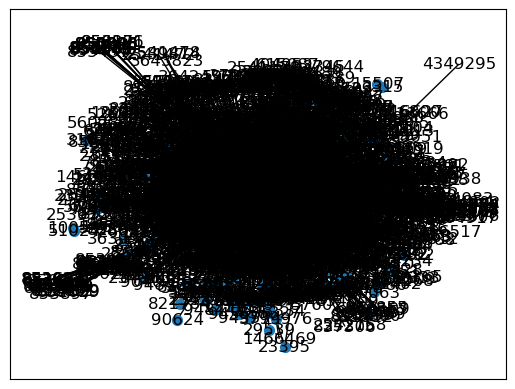

In [35]:
for com in communaute:
    nx.draw_networkx(G, nodelist=list(com), node_size=50)
    break